#Step 1: Prepare the Data

##1a) Import the Data

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(1234)

In [ ]:
import pandas as pd
dataset_path = "https://www.alvinang.sg/s/boston_housing_data.csv"                     
dataset = pd.read_csv(dataset_path)
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


##1b) Clean the Data

In [ ]:
dataset = dataset.dropna()
print(dataset.shape)

#but actually our data is already clean (we don't have missing data!)

(506, 14)


##1c) Train / Test Split

In [ ]:
#Split the data to train and test set
x_train = dataset.sample(frac=0.7,random_state=0)

#if you don't specify the random_state in the code,
#then every time you run(execute) your code 
#a new random value is generated 
#and the train and test datasets 
#would have different values each time.
#However, if a fixed value is assigned like 
#random_state = 0 or 1 or 42 or any other integer 
#then no matter 
#how many times you execute your code the result 
#would be the same 
#.i.e, same values in train and test datasets.

#Keep data not included in x_train
x_test = dataset.drop(x_train.index)

In [ ]:
#DataFrame.pop() removes and returns the column
y_train = x_train.pop('MEDV')
y_test = x_test.pop('MEDV')

##1d) Normalize the Data

In [ ]:
#Normalize the data (map to standard normal)

mean, std = x_train.mean(), x_train.std()
x_train = (x_train - mean)/std

#must reuse mean and std from x_train
x_test = (x_test - mean)/std



---



#Step 2: Build the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(64, 
                activation = 'relu', 
                input_shape=[len(x_train.keys())])) 
# first HIDDEN layer has 64 neurons

model.add(Dense(64, 
                activation = 'relu')) 
# second HIDDEN layer has 64 neurons

model.add(Dense(1, 
                activation = 'linear')) 
#output layer only 1 neuron, linear for regression

##2a) Alternative Way to Build the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
  Dense(64, activation = 'relu', input_shape=[ len(x_train.keys()) ])
  Dense(64, activation = 'relu')
  Dense(1, activation = 'linear')             
])

SyntaxError: ignored

##2b) Summary of the Model

In [ ]:
model.summary()

#first layer
#Dense = fully connected layers (every neuron is connected to 
#every other neuron in next layer)

#None = batch size passed into input, None means no limit on input data
#no batch size, all fed into neurons

#4160 = (64 * 64) weights to be optimized + 64 biases

#65 = 64 neurons into 1 output neuron (each with 1 weight) + 1 bias to be optimized


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


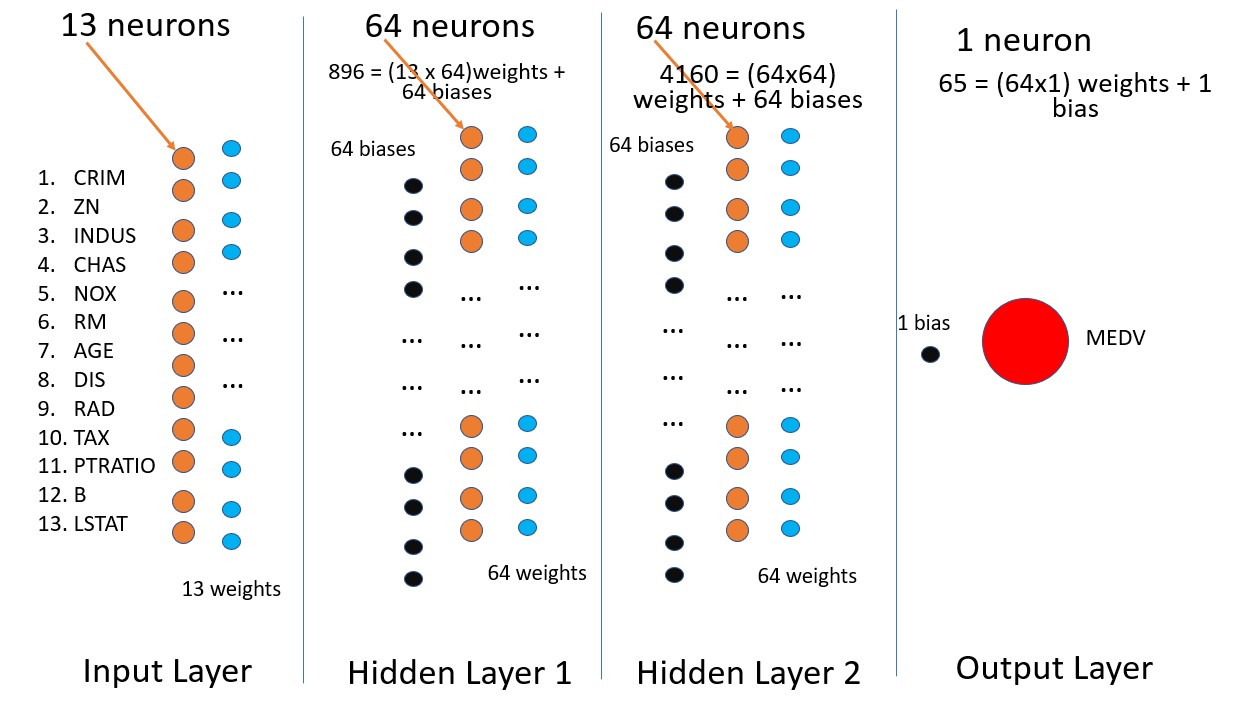

##2c) Visualize the Model

In [ ]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


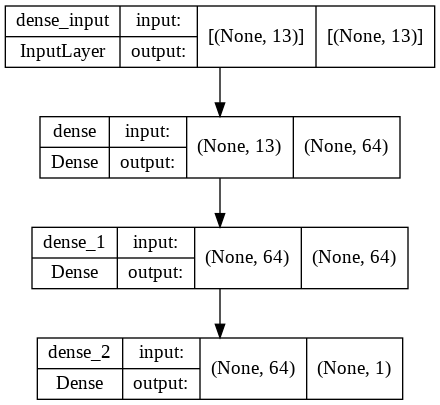

In [ ]:
import pydot
keras.utils.plot_model(model, 'model.png', show_shapes=True)

#u can see the model.png created in the folder at the left hand side

##2d) Take A Look At The Current Weights and Biases (NOTE THESE WEIGHTS ARE UNTRAINED!!!)

Meaning these weights are original values (unoptimized yet)

In [ ]:
weights, biases = model.layers[1].get_weights()

In [ ]:
weights
#the weights below show the current weights pre-assigned to every neuron
#note that we have NOT YET train the model, so these weights will change later on....
#after the model does Forward and Backward propogation during training....

array([[-0.0756193 , -0.15644723,  0.06410725, ..., -0.08596011,
         0.13058092, -0.07285866],
       [ 0.0287565 , -0.12320569,  0.039371  , ...,  0.14496563,
         0.07094182,  0.10176502],
       [-0.18412958, -0.21576741, -0.20589474, ...,  0.16648333,
        -0.1505978 ,  0.05729465],
       ...,
       [ 0.08787243, -0.06092881, -0.09956671, ...,  0.0216534 ,
         0.18948139, -0.10258875],
       [-0.0969634 ,  0.09614818,  0.08704536, ...,  0.14886974,
         0.15804882,  0.09665899],
       [ 0.11953463, -0.05277762, -0.1053816 , ..., -0.07428138,
         0.07792281, -0.03011926]], dtype=float32)

In [ ]:
weights.shape

# why (64, 64)? 
# because there are 64 weights tied to the first HIDDEN layer of 64 neurons
# subsequently, there are another 64 weights for the next HIDDEN layer of 64 neurons 

# Note: input layer is has 13 neurons 
# input layer is not considered as 1st layer

(64, 64)

In [ ]:
biases

#note that the biases are all initialized at 0 (they are the current untrained values)
#subsequently later during training, these biases will be changed 
#during FWD and BACKWARD propogation

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
biases.shape

#we have 64 biases to be optimized later
#64 biases shared between both HIDDEN layers (same values)

(64,)



---



#Step 3: Compile the Model

In [ ]:
optimizer = keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer = optimizer, metrics=['mse'])

###Loss

https://keras.io/api/losses/regression_losses/#meansquarederror-class

use MSE or MAE for Regression

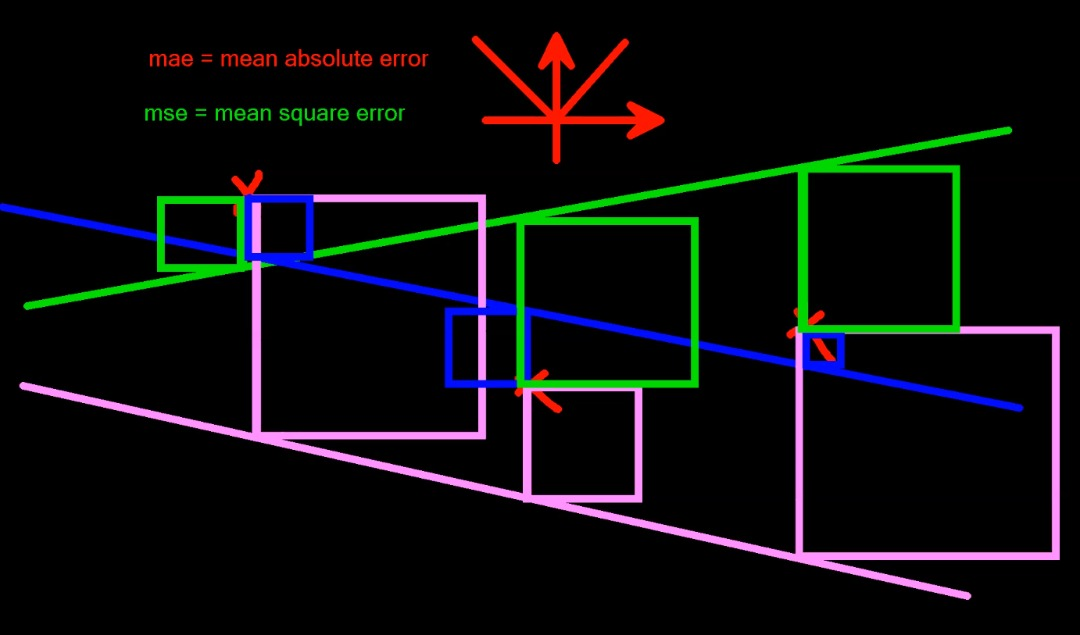

###Optimizer

optimizer will estimate the gradient and move the set of weights closer to
the minumum at each successive step

we minimze the loss by changing the weights

we change the weights by looking at the gradient of the loss function at that point (given that set of weights)

https://keras.io/api/optimizers/rmsprop/


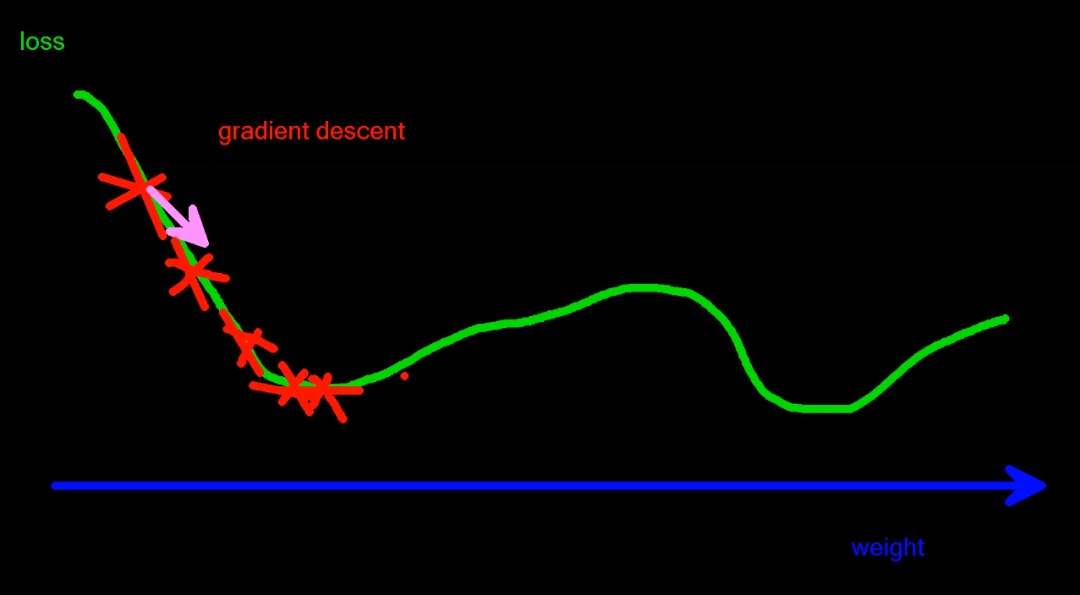



---



#Step 4: Train the Model

In [ ]:
EPOCHS = 100
# number of rounds of going through the data
# update the weights for each epoch
#x_test, y_test are never used for training, only for calculating metrics

history = model.fit(x_train, y_train, epochs=EPOCHS, 
                    validation_data=(x_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 541.7734 - mse: 541.7734 - val_loss: 536.5867 - val_mse: 536.5867
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 462.4286 - mse: 462.4286 - val_loss: 453.9641 - val_mse: 453.9641
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 385.2557 - mse: 385.2557 - val_loss: 361.5571 - val_mse: 361.5571
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 304.4932 - mse: 304.4932 - val_loss: 278.2777 - val_mse: 278.2777
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 228.9654 - mse: 228.9654 - val_loss: 202.0322 - val_mse: 202.0322
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 163.6754 - mse: 163.6754 - val_loss: 133.3781 - val_mse: 133.3781
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 111.5880 - mse: 111.5880 - val_loss: 90.3913 - val_mse: 90.3913
Epoch 8/100
12/12 [=========



---



#Step 5:  Visualize the Error or Loss

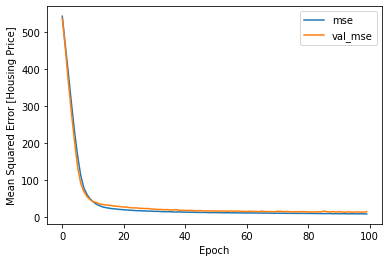

In [ ]:
mse = history.history['mse']
val_mse = history.history['val_mse']
epoch = range(len(mse))

import matplotlib.pyplot as plt
plt.plot(epoch, mse, label = 'mse')
plt.plot(epoch, val_mse, label = 'val_mse')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error [Housing Price]')
plt.legend()
plt.show()

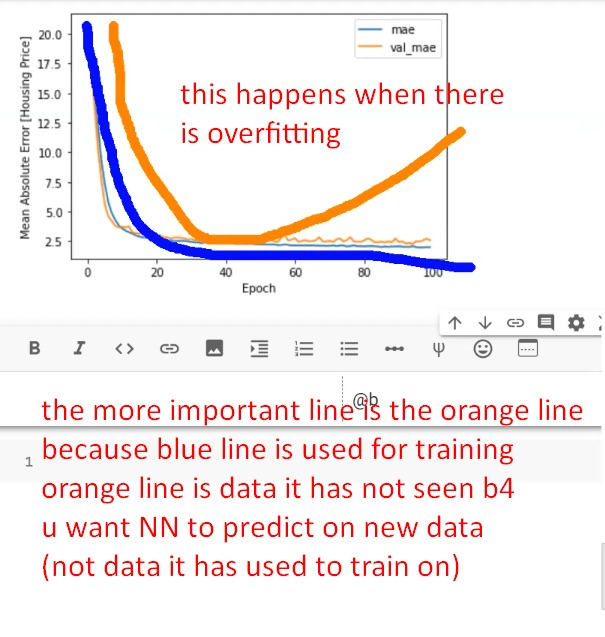



---



#Step 6: Evaluate the Model

In [ ]:
loss, mse = model.evaluate(x_test, y_test)
print(loss, mse)

#loss == mse here because we set our 
#loss to mse and metric also to mse earlier
#output here is same as 
#looking at the last values of the last epoch

5/5 [==============================] - 0s 2ms/step - loss: 14.0236 - mse: 14.0236
14.023615837097168 14.023615837097168




---



#Step 7: Make Prediction

##7a) Create a Row of New Data: new_x_data

In [ ]:
dataset.sample()
#we take a look at a sample row of data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
311,0.79041,0.0,9.9,0,0.544,6.122,52.8,2.6403,4,304.0,18.4,396.9,5.98,22.1


In [ ]:
#we create a NEW row of data
new_x_data = {
    "CRIM"   : [1.39],
    "ZN"     : [0], 
    "INDUS"  : [8.14],
    "CHAS"   : [0], 
    "NOX"    : [0.5],
    "RM"     : [6.5],
    "AGE"    : [71.0],
    "DIS"    : [3.15],
    "RAD"    : [6],
    "TAX"    : [210.0],
    "PTRATIO": [17.5],
    "B"      : [390.5], 
    "LSTAT"  : [27.4]
    }

In [ ]:
new_x_df = pd.DataFrame(new_x_data)
new_x_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.39,0,8.14,0,0.5,6.5,71.0,3.15,6,210.0,17.5,390.5,27.4


##7b) Normalize the New Data: norm_new_x_data

In [ ]:
#Normalize the new_x_df (map to standard normal)

norm_new_x_df = (new_x_df - mean)/std

#we make use of the "mean" & "std" derived from x_train previously

In [ ]:
norm_new_x_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.10089,-0.480235,-0.458143,-0.275269,-0.467376,0.334881,0.105261,-0.270884,1.096649,-1.216907,-0.447171,0.394504,2.106199


##7c) Predict the NEW_Y

In [ ]:
NEW_Y = model.predict(norm_new_x_df)
#fit 'norm_new_x_df' to the model

In [ ]:
NEW_Y

#given the parameters above, the 'NEW MEDV' is 27

array([[27.391426]], dtype=float32)

##7d) Plot a Predicted Value of Housing Price vs Actual Value of Housing Price (using TEST dataset)

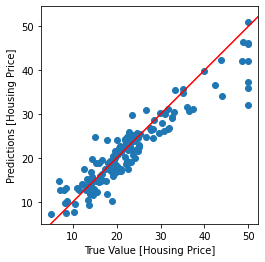

In [ ]:
y_hat = model.predict(x_test)
#yhat is the predicted values for y given x_test

plt.scatter(y_test, y_hat)
plt.xlabel('True Value [Housing Price]')
plt.ylabel('Predictions [Housing Price]')
plt.axis('equal')
plt.axis('square')
plt.plot([0,100],[0,100], color='r')
plt.show()

#if the model is perfect, all the blue dots will
#fall on the red line

##NOTE: For Regression, you can't have the metric 'accuracy'
#For Classification, you can use 'Accuracy' as the metric
#and you can plot a 'accuracy' graph to see its accuracy
#thus, you can't see the Accuracy curve here for Regression
#only way is to plot the graph (predicted vs actual) below to check its Accuracy



---



#Step 8: Save the Model

we need to save so that we don't have to call back all hyperparameters in future

we can reuse the model and start off from the lowest MSE

##8a) Save in h5 format

In [ ]:
model.save('regression.h5')
#h5 means HDF5 format
#it saves the model configuration, weights
#bias and all hyperparameters

##8b) Save in Folder

In [ ]:
model.save('regression/1/')
#you can split up into multiple files to 
#load into raspberry pi (check the folder on the left)

INFO:tensorflow:Assets written to: regression/1/assets




---



#Step 9: Load the Model

In [ ]:
new_model = keras.models.load_model('regression.h5')

#you may use the new_model to do prediction immediately
#dun need to retrain

##9a) Use New_Model to Predict on x_test

In [ ]:
new_model.predict(x_test)

array([[25.204088 ],
       [16.85039  ],
       [17.13283  ],
       [15.691304 ],
       [14.136734 ],
       [17.388187 ],
       [15.606842 ],
       [15.244689 ],
       [20.673803 ],
       [22.079357 ],
       [26.251652 ],
       [31.05629  ],
       [25.507431 ],
       [25.732513 ],
       [19.675589 ],
       [19.707535 ],
       [18.725399 ],
       [21.77066  ],
       [26.509542 ],
       [22.158886 ],
       [22.236378 ],
       [17.139435 ],
       [25.170761 ],
       [23.378101 ],
       [21.602802 ],
       [23.848196 ],
       [21.801262 ],
       [23.54455  ],
       [29.913578 ],
       [24.43418  ],
       [16.971878 ],
       [26.592173 ],
       [42.369728 ],
       [35.60715  ],
       [19.771816 ],
       [17.589409 ],
       [19.275623 ],
       [17.708546 ],
       [20.973436 ],
       [17.594494 ],
       [15.963776 ],
       [18.833235 ],
       [20.4897   ],
       [19.965473 ],
       [12.200071 ],
       [11.60509  ],
       [11.802412 ],
       [16.68

In [ ]:
new_model.predict(x_test).flatten()
#too long so we flatten it!

array([25.204088 , 16.85039  , 17.13283  , 15.691304 , 14.136734 ,
       17.388187 , 15.606842 , 15.244689 , 20.673803 , 22.079357 ,
       26.251652 , 31.05629  , 25.507431 , 25.732513 , 19.675589 ,
       19.707535 , 18.725399 , 21.77066  , 26.509542 , 22.158886 ,
       22.236378 , 17.139435 , 25.170761 , 23.378101 , 21.602802 ,
       23.848196 , 21.801262 , 23.54455  , 29.913578 , 24.43418  ,
       16.971878 , 26.592173 , 42.369728 , 35.60715  , 19.771816 ,
       17.589409 , 19.275623 , 17.708546 , 20.973436 , 17.594494 ,
       15.963776 , 18.833235 , 20.4897   , 19.965473 , 12.200071 ,
       11.60509  , 11.802412 , 16.689629 , 46.291904 , 22.612259 ,
       24.79614  , 22.820522 , 24.0702   , 25.484776 , 30.26972  ,
       39.791245 , 29.096848 , 25.786652 , 26.750504 , 30.61434  ,
       29.967377 , 42.185547 , 27.911669 , 20.116842 , 36.59668  ,
       42.107094 , 17.596165 , 18.303303 , 18.838078 , 26.776016 ,
       31.172157 , 18.588966 , 25.039103 , 14.892544 , 24.6457



---



#THE END

---

